In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error



In [71]:
df_modeling = pd.read_csv(filepath_or_buffer= "../data/Dataset_for_modeling.csv") 
df_modeling

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Arcade,Category_Books & Reference,Category_Business,...,Category_Productivity,Category_Puzzle,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel & Local,Category_other,Content_Rating_Everyone,Content_Rating_Not for Everyone
0,3.9,68.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.3,918.0,1,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,5.0,6.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,830.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9659,4.3,142.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9660,5.0,9.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9661,0.0,0.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train-Test-Split

In [72]:
X = df_modeling.drop(columns= 'Rating')
y = df_modeling['Rating']

In [73]:
X.shape

(9663, 29)

In [74]:
y.shape

(9663,)

In [75]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 1234)

In [96]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [10, 20, 30],
        'model__min_samples_split' :[2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s


[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=10; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [10, 20, 30],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10]}],
             verbose=2)

In [97]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2} with a score of 0.94


We run the model withouth the pca. We can see that the model max_depth reach the minimum range (how deep the tree is) 
the model__min_samples_leaf reach the top range(minumum number of sample at the base of the tree)
the model__min_sample_split reacht the top range(minimum number of samples required to split an internal node) 
We are going to rerun the model with different hyperparameters range and add pca. 


In [98]:
y_pred1 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
r2 = r2_score(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred1))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)


Mean Absolute Error (MAE): 0.28116407173442576
Root Mean Square Error (RMSE): 0.49714008797112774
Coefficient of Determination (R-squared): 0.944296351983478
Mean Squared Error (MSE): 0.24714826706794063
Root Mean Squared Logarithmic Error (RMSLE): 0.10854781841700337


In [99]:
grid_search.score(X_test, y_test)

0.944296351983478

In [102]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [2, 4, 6, 8],
        'model__min_samples_split' :[2, 4],
        'model__min_samples_leaf': [1, 2, 3]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [2, 4, 6, 8],
                          'model__min_samples_leaf': [1, 2, 3],
                          'model__min_samples_split': [2, 4]}],
             verbose=1)

In [103]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 8, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4} with a score of 0.55


For this model the max depth is only at 2 (the lowest range), the min samples leaf is at 6 (middle range) and the min samples split is at 10 (lowest range).


In [104]:
y_pred2 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
r2 = r2_score(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred2))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

Mean Absolute Error (MAE): 0.7520138679864303
Root Mean Square Error (RMSE): 1.2112844258753217
Coefficient of Determination (R-squared): 0.6693120766401608
Mean Squared Error (MSE): 1.4672099603681075
Root Mean Squared Logarithmic Error (RMSLE): 0.4587136209608288


In [105]:
grid_search.score(X_test, y_test)

0.6693120766401608

In [106]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [2, 4, 6],
        'model__min_samples_split' :[0.5],
        'model__min_samples_leaf': [1]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [2, 4, 6],
                          'model__min_samples_leaf': [1],
                          'model__min_samples_split': [0.5]}],
             verbose=1)

In [107]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 0.5} with a score of 0.14


For this model the max depth is only at 1, the min samples leaf is at 1(lower range) and the min samples split is at 8 (upper range).

In [108]:
y_pred3 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
r2 = r2_score(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred3))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

Mean Absolute Error (MAE): 1.8985364103884568
Root Mean Square Error (RMSE): 2.0172887422586974
Coefficient of Determination (R-squared): 0.08280390284189287
Mean Squared Error (MSE): 4.069453869643677
Root Mean Squared Logarithmic Error (RMSLE): 0.8228879054299002


In [109]:
grid_search.score(X_test, y_test)

0.08280390284189287

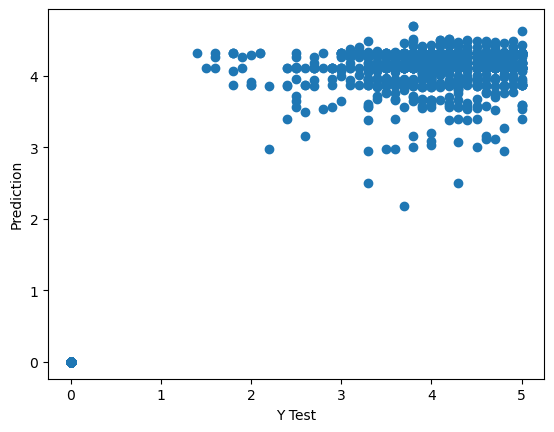

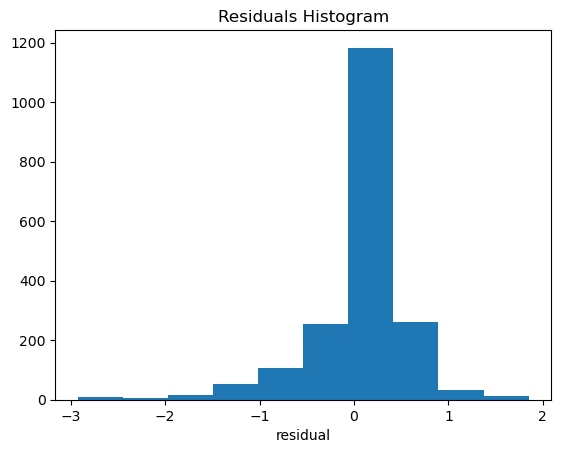

{'whiskers': [<matplotlib.lines.Line2D at 0x20a57176f10>,
 'caps': [<matplotlib.lines.Line2D at 0x20a571802d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a571766d0>,
 'medians': [<matplotlib.lines.Line2D at 0x20a57181210>,
 'fliers': [<matplotlib.lines.Line2D at 0x20a564aa610>,
 'means': []}

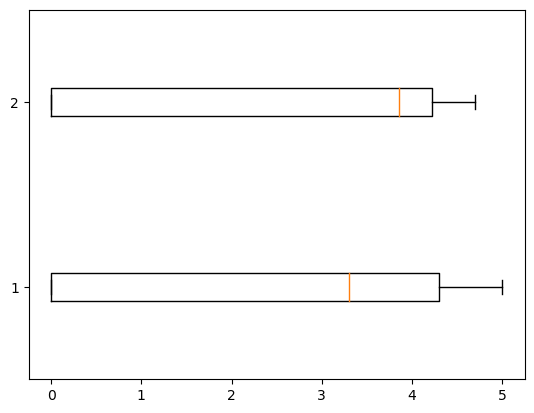

In [110]:
metrics.r2_score(y_test, y_pred1)

plt.scatter(y_test, y_pred1)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred1])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()

plt.boxplot([y_test, y_pred1], vert=False)


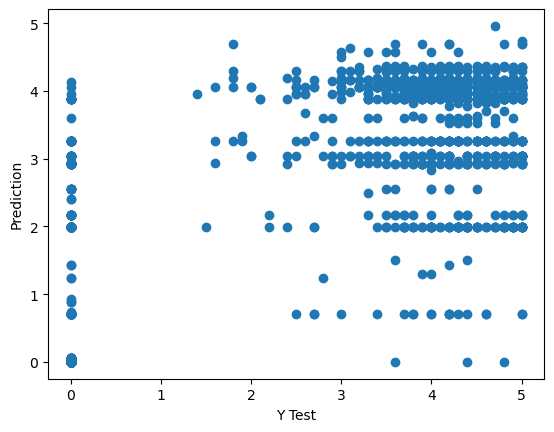

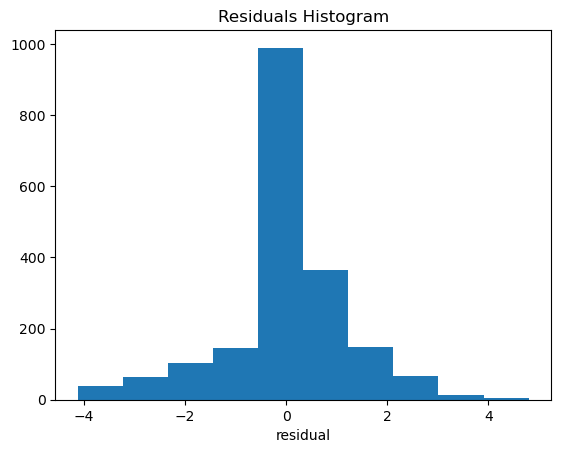

{'whiskers': [<matplotlib.lines.Line2D at 0x20a572096d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20a571e4950>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a57208f90>,
 'medians': [<matplotlib.lines.Line2D at 0x20a571e7010>,
 'fliers': [<matplotlib.lines.Line2D at 0x20a571e7290>,
 'means': []}

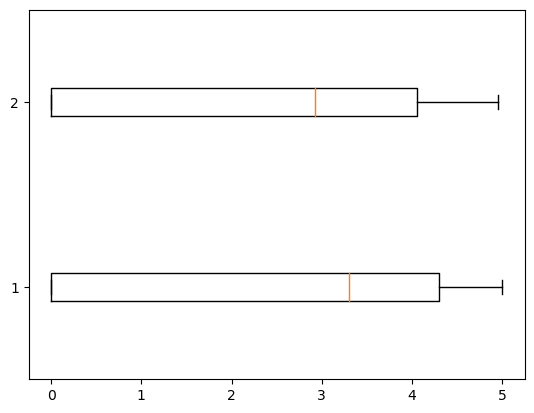

In [111]:
metrics.r2_score(y_test, y_pred2)

plt.scatter(y_test, y_pred2)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred2])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()

plt.boxplot([y_test, y_pred2], vert=False)


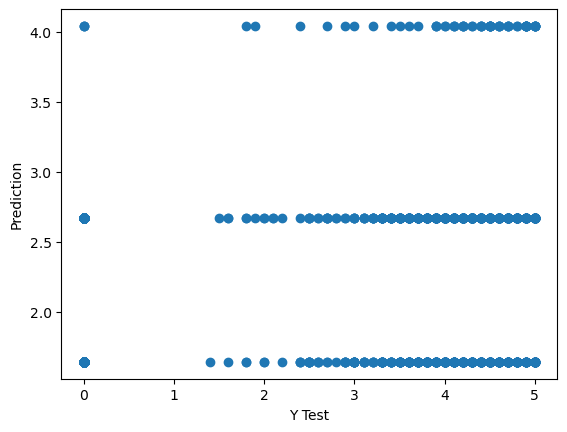

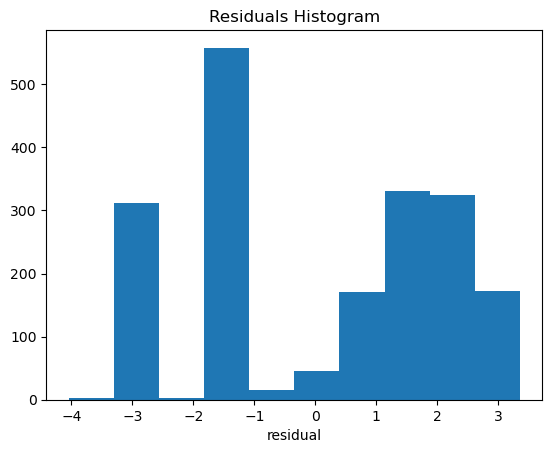

{'whiskers': [<matplotlib.lines.Line2D at 0x20a56811150>,
 'caps': [<matplotlib.lines.Line2D at 0x20a568124d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a56810910>,
 'medians': [<matplotlib.lines.Line2D at 0x20a56813490>,
 'fliers': [<matplotlib.lines.Line2D at 0x20a56813ad0>,
 'means': []}

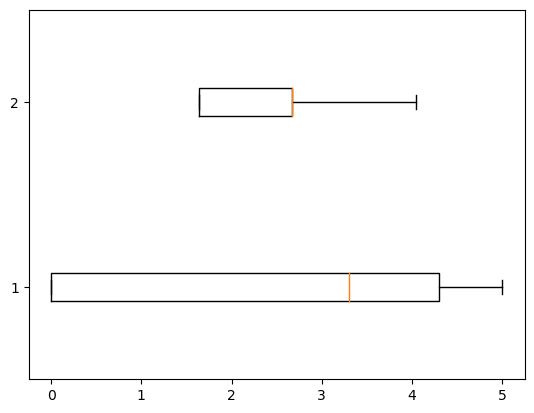

In [112]:
metrics.r2_score(y_test, y_pred3)

plt.scatter(y_test, y_pred3)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred3])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()

plt.boxplot([y_test, y_pred3], vert=False)
